# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

### Importing all the necessary libraries

In [35]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import cos, sin, pi, exp

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [36]:
def f1(x):
    return x**2 + 3*x + 8
def f1d(x):
    return 2*x + 3

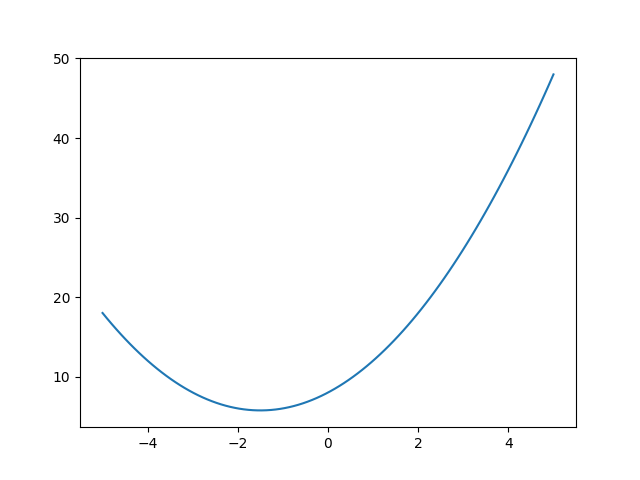

In [37]:
xbase = np.linspace(-5, 5, 100)
ybase = f1(xbase)
bestcost = 100000
bestx = 1
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
lr = 0.1
def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - f1d(bestx) * lr 
    bestx = x
    y = f1(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
ani= FuncAnimation(fig, onestepderiv, frames=range(100), interval=1, repeat=False)
plt.show()

In [38]:
print(bestx)
print(f1(bestx))

-1.4999999995925928
5.75


## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [39]:
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

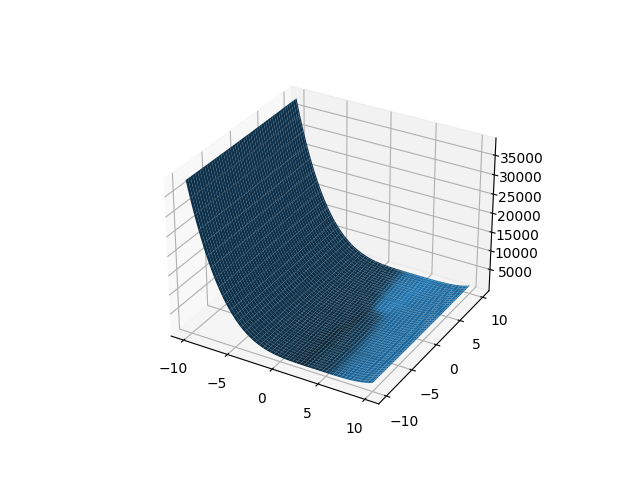

In [40]:
xbase = np.linspace(-10, 10, 100)
ybase = np.linspace(-10, 10, 100)
xmesh, ymesh = np.meshgrid(xbase, ybase)
zmesh = f3(xmesh, ymesh)
bestx, besty = -4,2
lr = 0.001
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xmesh, ymesh, zmesh)
xall, yall, zall = [], [], []
lnall,  = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go',markersize=10)
def onestepderiv(frame):
    global bestcost, bestx, besty, lr
    x = bestx - df3_dx(bestx, besty) * lr
    y = besty - df3_dy(bestx, besty) * lr
    bestx, besty = x, y
    z = f3(x, y)
    lngood.set_data([x], [y])
    lngood.set_3d_properties([z])
    xall.append(x)
    yall.append(y)
    zall.append(z)
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)
ani = FuncAnimation(fig, onestepderiv, frames=range(10000), interval=0.1, repeat=False)
plt.show()

In [42]:
print(bestx)
print(besty)
print(f3(bestx,besty))

3.888250212932315
2.0
2.000155950516387


## Problem 3 - 2-D function 

Derivatives and limits given. 

In [43]:
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)
def df4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)
def df4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

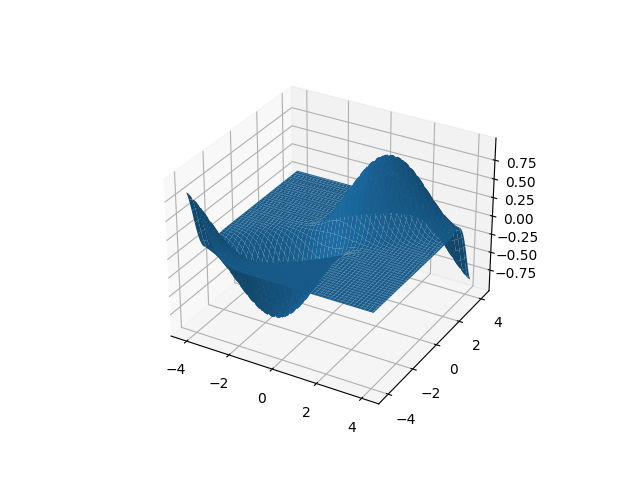

In [44]:
xbase = np.linspace(-pi-1, pi+1, 100)
ybase = np.linspace(-pi-1, pi+1, 100)
xmesh, ymesh = np.meshgrid(xbase, ybase)
zmesh = f4(xmesh, ymesh)
bestx, besty = 1,1
lr = 0.05
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xmesh, ymesh, zmesh)
xall, yall, zall = [], [], []
lnall,  = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go', markersize=10)
def onestepderiv(frame):
    global bestcost, bestx, besty, lr
    x = bestx - df4_dx(bestx, besty) * lr
    y = besty - df4_dy(bestx, besty) * lr
    bestx, besty = x, y
    z = f4(x, y)
    lngood.set_data([x], [y])
    lngood.set_3d_properties([z])
    xall.append(x)
    yall.append(y)
    zall.append(z)
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)
ani = FuncAnimation(fig, onestepderiv, frames=range(1000), interval=0.1, repeat=False)
plt.show()

In [45]:
print(bestx)
print(besty)
print(f4(bestx,besty))

-1.5707962992482392
-1.5707963052871166
-0.9999999999999998


## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [46]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def df5(x):
    return -1*sin(x)*(4*cos(x)**3+3*sin(x)*cos(x)+8*cos(x)+1)

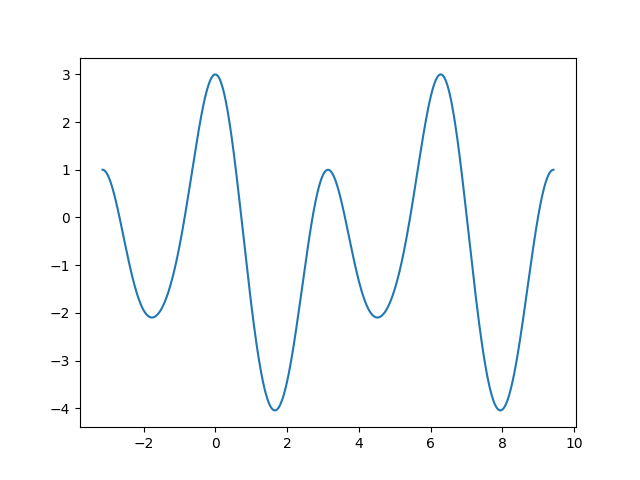

In [47]:
xbase = np.linspace(-pi, 3*pi, 1000)
ybase=f5(xbase)
bestx = 3
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
lr = 0.05
def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - df5(bestx) * lr 
    bestx = x
    y = f5(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
ani= FuncAnimation(fig, onestepderiv, frames=range(100), interval=1000, repeat=False)
plt.show() 

In [48]:
print(bestx)
print(f5(bestx))

1.6616608259064418
-4.045412051572551


### Explanation :

- As we use the same piece of code in all the questions the process is same except that of the input functions and its derivatives and the number of variables present in it 

The FuncAnimation class of Matplotlib is used to create the animation. In order to update the current solution bestx using the gradient descent algorithm, compute the associated function value y, and update the plots that display the current point in red and the trajectory of the optimisation process in green, the onestepderiv function is called on each frame.
The function that is being optimised is first plotted using the xbase and ybase arrays.

### Approach to opimise given unknown function

We can write a function which takes the given function and gives the gives the value of dx (i.e, small difference which is helpful in process)

- ###  If it is of one variable:

#### d(f(x)) = (f(x+dx)-f(x))/dx

- ### if it has two variables

#### df_dx(x,y)=(f(x+dx,y)-f(x,y))/dx
#### df_dy(x,y)=(f(x,y+dy)-f(x,y))/dy

by altering the code in this manner we can obtain minimum value